# Remove isolated blocks of pixels
and keep only the biggest island

### Problem:
We have an image of a galaxy. We want to create a mask that define the galaxy itself.
* ignore stars and other objects
* the mask should not have holes

In [1]:
# import modules and set some matplotlib params 
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage
from astropy.io import fits

cmap=plt.cm.gray
cmap = mpl.colors.ListedColormap(['white', 'cyan','red','green','yellow','purple','blue'])
mpl.rcParams['figure.figsize'] = (10,10)
mpl.rcParams['image.origin'] = 'lower'
mpl.rcParams['image.interpolation'] = 'nearest'


read the fits file

In [2]:
ifile='ima.fits'
data=fits.getdata(ifile,1)
print (data.shape)


(256, 256)


define the threshold and show the image

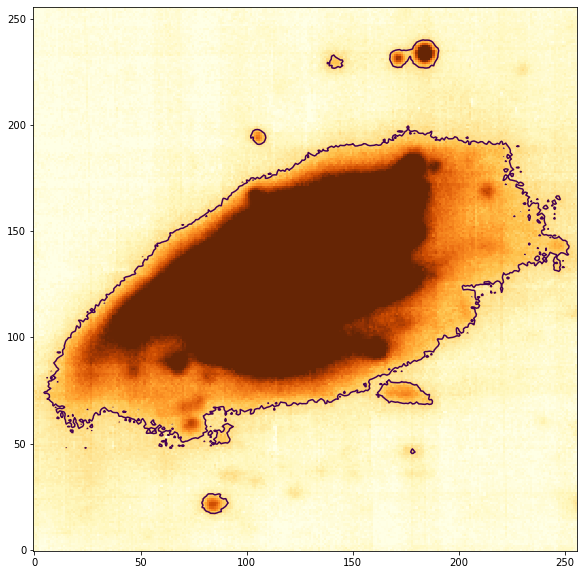

In [3]:

lum_thres=3
plt.figure()
plt.imshow(data,vmin=0,vmax=10,cmap=plt.cm.YlOrBr);
plt.contour(data,levels=[lum_thres,]);

Now we define a boolean mask selecting all pixels above the threshold.<br />
display the map

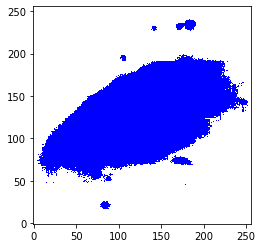

In [4]:
# all points >0 are set to 1
mask0=data>lum_thres

# plot the mask
plt.figure(figsize=(4,4))
plt.imshow(mask0,vmin=0,vmax=1,cmap=cmap);


We now have to remove all objects different from the galaxy.<br />

* detect all blocks of connected pixels (island) on the mask
* select only the biggest one
* fill the hole in it
* Smooth the borders of the resulting mask

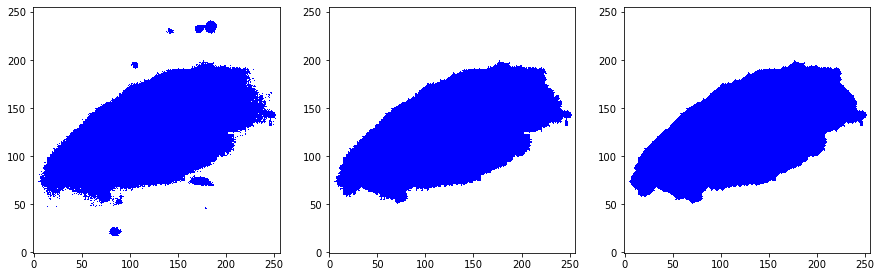

In [5]:
# label image, create an array that define each island with unique integer
mask_labels, mask_nb = ndimage.label(mask0)
# calculate area of each island
mask_areas = np.array(ndimage.sum(mask0, mask_labels, np.arange(mask_labels.max()+1)))
# select only the biggest island
mask1=mask_labels==np.argmax(mask_areas)

# fill holes
maskf = ndimage.binary_fill_holes(mask1)

# use closing to remove noise..
maskf2=ndimage.binary_closing(maskf,iterations=2)

fig, (a,b,c) = plt.subplots(1,3, figsize=(15,7))

a.imshow(mask0,cmap=cmap)
b.imshow(maskf,cmap=cmap)
c.imshow(maskf2,cmap=cmap)


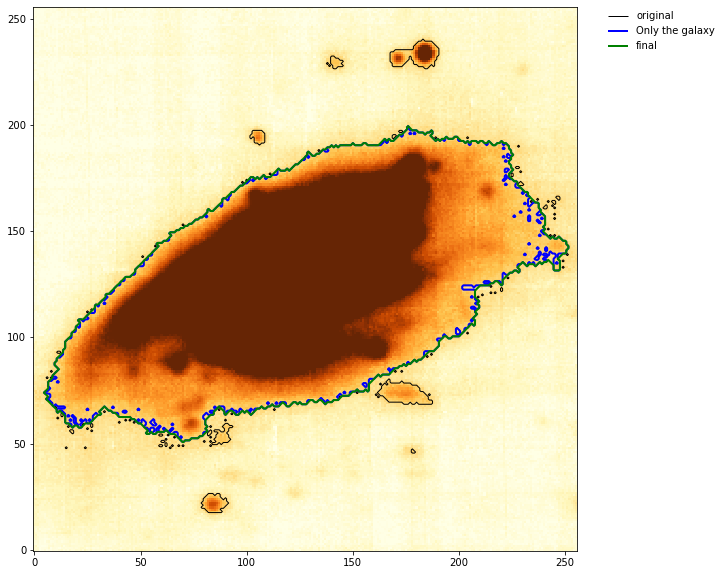

In [6]:
plt.figure()
plt.imshow(data,vmin=0,vmax=10,cmap=plt.cm.YlOrBr);

cs1=plt.contour(mask0,levels=[0.5,],colors='k',linewidths=1);
cs2=plt.contour(mask1,levels=[0.5,],colors='b',linewidths=2);
cs3=plt.contour(maskf2,levels=[0.5,],colors='g',linewidths=2);

labels = ['original', 'Only the galaxy','final']
for cs,lab in zip([cs1,cs2,cs3],labels):
    cs.collections[0].set_label(lab)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,frameon=False);
                 